In [1]:
import pandas as pd
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt

In [2]:
base_dir = '/shared/2/projects/framing/intermediate_results/'
frame_types = ['all_frames','Narrative','Issue-general','Immigration-specific']
threshold_settings = ['default','lower']

In [3]:
date = '05-18-20'
num_epochs = 20
results_list = []
for frame_type in frame_types:
    for thresh in threshold_settings:
        model_dir = os.path.join(base_dir,f'roberta_classify_{date}_{frame_type}_{num_epochs}_epochs_{thresh}_thresh')
        eval_file = os.path.join(model_dir,'eval_results.txt')
        with open(eval_file,'r') as f:
            results = {}
            results['frame type'] = frame_type
            results['threshold'] = thresh
            for row in f.read().split('\n'):
                if '=' in row:
                    metric,score = row.split(' = ')
                    results[metric] = score
            results_list.append(results)


In [6]:
df = pd.DataFrame(results_list)[['frame type','threshold','f1']]
lr_df = pd.DataFrame()
lr_df['frame type'] = ['all_frames','Narrative','Issue-general','Immigration-specific']
lr_df['threshold'] = 'logreg'
lr_df['f1'] = [0.3583899172874922,0.6963017728693991,0.2296208841663387,0.23379629629629634]
df = pd.concat([df,lr_df])

In [7]:
df

,frame type,threshold,f1
0,all_frames,default,0.36698794213025704
1,all_frames,lower,0.45121328704664004
2,Narrative,default,0.8110516934046347
3,Narrative,lower,0.8110516934046347
4,Issue-general,default,0.38281208491374674
5,Issue-general,lower,0.5009031789829721
6,Immigration-specific,default,0.21955128205128205
7,Immigration-specific,lower,0.37577160493827155
0,all_frames,logreg,0.35839
1,Narrative,logreg,0.696302


In [76]:
for dataset in ['train','dev','test']:
    datafile = f'/shared/2/projects/framing/data/classifier_data_05-13-20/{dataset}_all_frames.tsv'
    print(dataset,pd.read_csv(datafile,sep='\t').shape)

train (261, 31)
dev (50, 31)
test (19, 31)


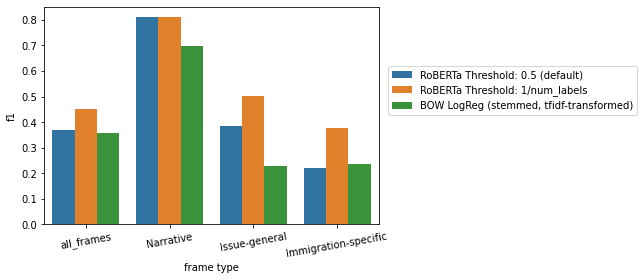

In [16]:
sns.barplot(x='frame type',y='f1',data=df,hue='threshold')
plt.xticks(rotation=10)
L=plt.legend(loc='upper center',bbox_to_anchor=(1.4,.75))
L.get_texts()[0].set_text('RoBERTa Threshold: 0.5 (default)')
L.get_texts()[1].set_text('RoBERTa Threshold: 1/num_labels')
L.get_texts()[2].set_text('BOW LogReg (stemmed, tfidf-transformed)')